In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
import varstool

%matplot inline

c:\Users\user\anaconda3\envs\PRA_sampler\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
UsageError: Line magic function `%matplot` not found.


#### **[Docs. for sampling functions](https://vars-tool.readthedocs.io/en/latest/source/varstool.sampling.html#module-varstool.sampling)**

This module contains 6 different sampling methods, that are:  

1. <span style='color:lightblue'>**halton sequence**</span>
2. <span style='color:lightblue'>**lating hypercube sampling (lhs)**</span> 
3. <span style='color:lightblue'>**symetrical latin hypercube sampling (symlhs)**</span> 
4. <span style='color:lightblue'>**progressive lating hypercube sampling (plhs)**</span> 
5. <span style='color:lightblue'>**sobol sequence (sobol)**</span> 
6. Generalized Star‐Based (gSTAR) Sampling
7. STAR sampling (starvars)


In [2]:
rand_seed0 = 1234
n_params, n_samples = 10, 30
n_slices = 5
sub_dims = [1, 2]
X = dict()

In [3]:
def plot_scatter_plot(X_temp, sub_dims = [0, 1]):
    x, y = X_temp[:, sub_dims[0]], X_temp[:, sub_dims[1]]
    plt.figure(figsize=(10, 10), dpi = 150)
    grid = plt.GridSpec(3, 3, wspace = .25, hspace = .25)
    plt.subplot(grid[0:2, 0])
    plt.scatter(0.5 * np.ones_like(y), y)
    plt.hlines(y = np.linspace(0, 1.0, x.shape[0]-1), xmin = 0, xmax=1, linestyles=':', colors='r')
    plt.ylim([0, 1])
    
    plt.subplot(grid[0:2, 1:])
    plt.scatter(x, y)
    plt.hlines(y = np.linspace(0, 1.0, x.shape[0]-1), xmin = 0, xmax=1, linestyles=':', colors='r')
    plt.vlines(x = np.linspace(0, 1.0, x.shape[0]-1), ymin = 0, ymax=1, linestyles=':', colors='r')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    plt.subplot(grid[2, 1:])
    plt.scatter(x, np.ones_like(x)*0.5)
    plt.vlines(x = np.linspace(0, 1.0, x.shape[0]-1), ymin = 0, ymax=1, linestyles=':', colors='r')
    plt.xlim([0, 1])
    plt.show()

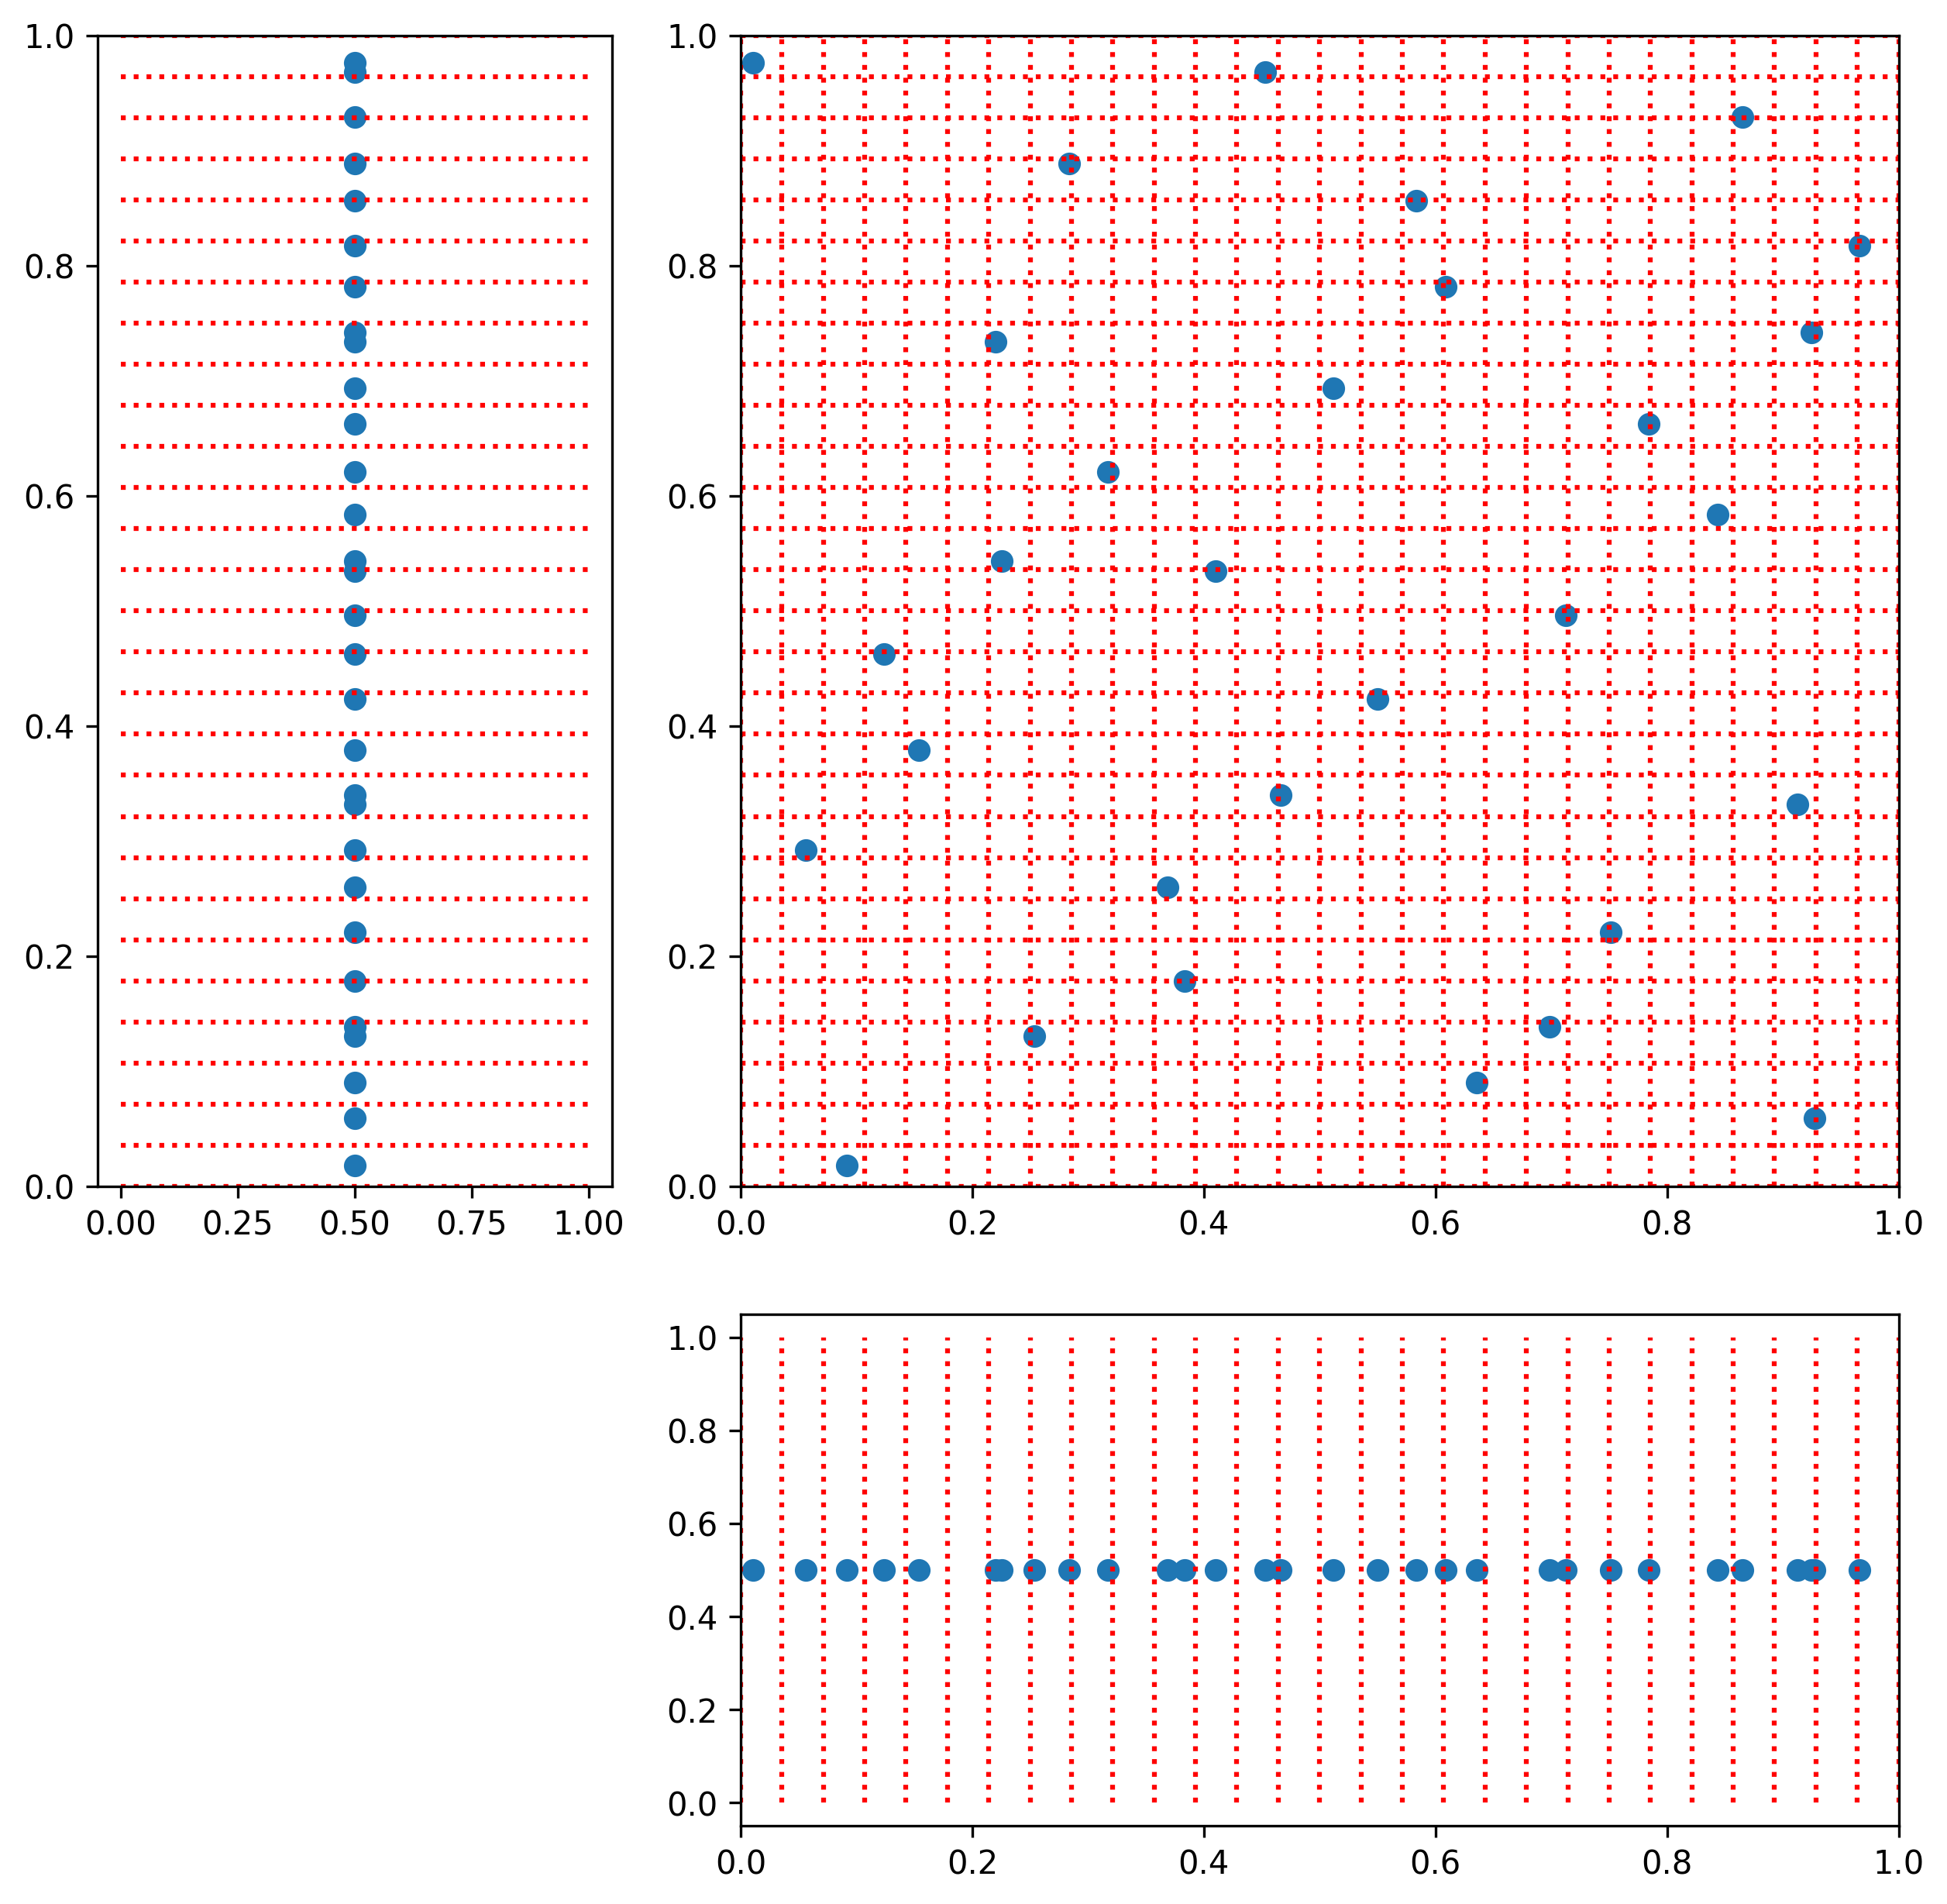

In [4]:
import varstool.sampling.halton as halton

X_temp = halton(
    sp = n_samples, params=n_params, seed=rand_seed0, 
    skip = 1000, leap = 1000)
X['Halton'] = X_temp
plot_scatter_plot(X_temp, sub_dims = sub_dims)

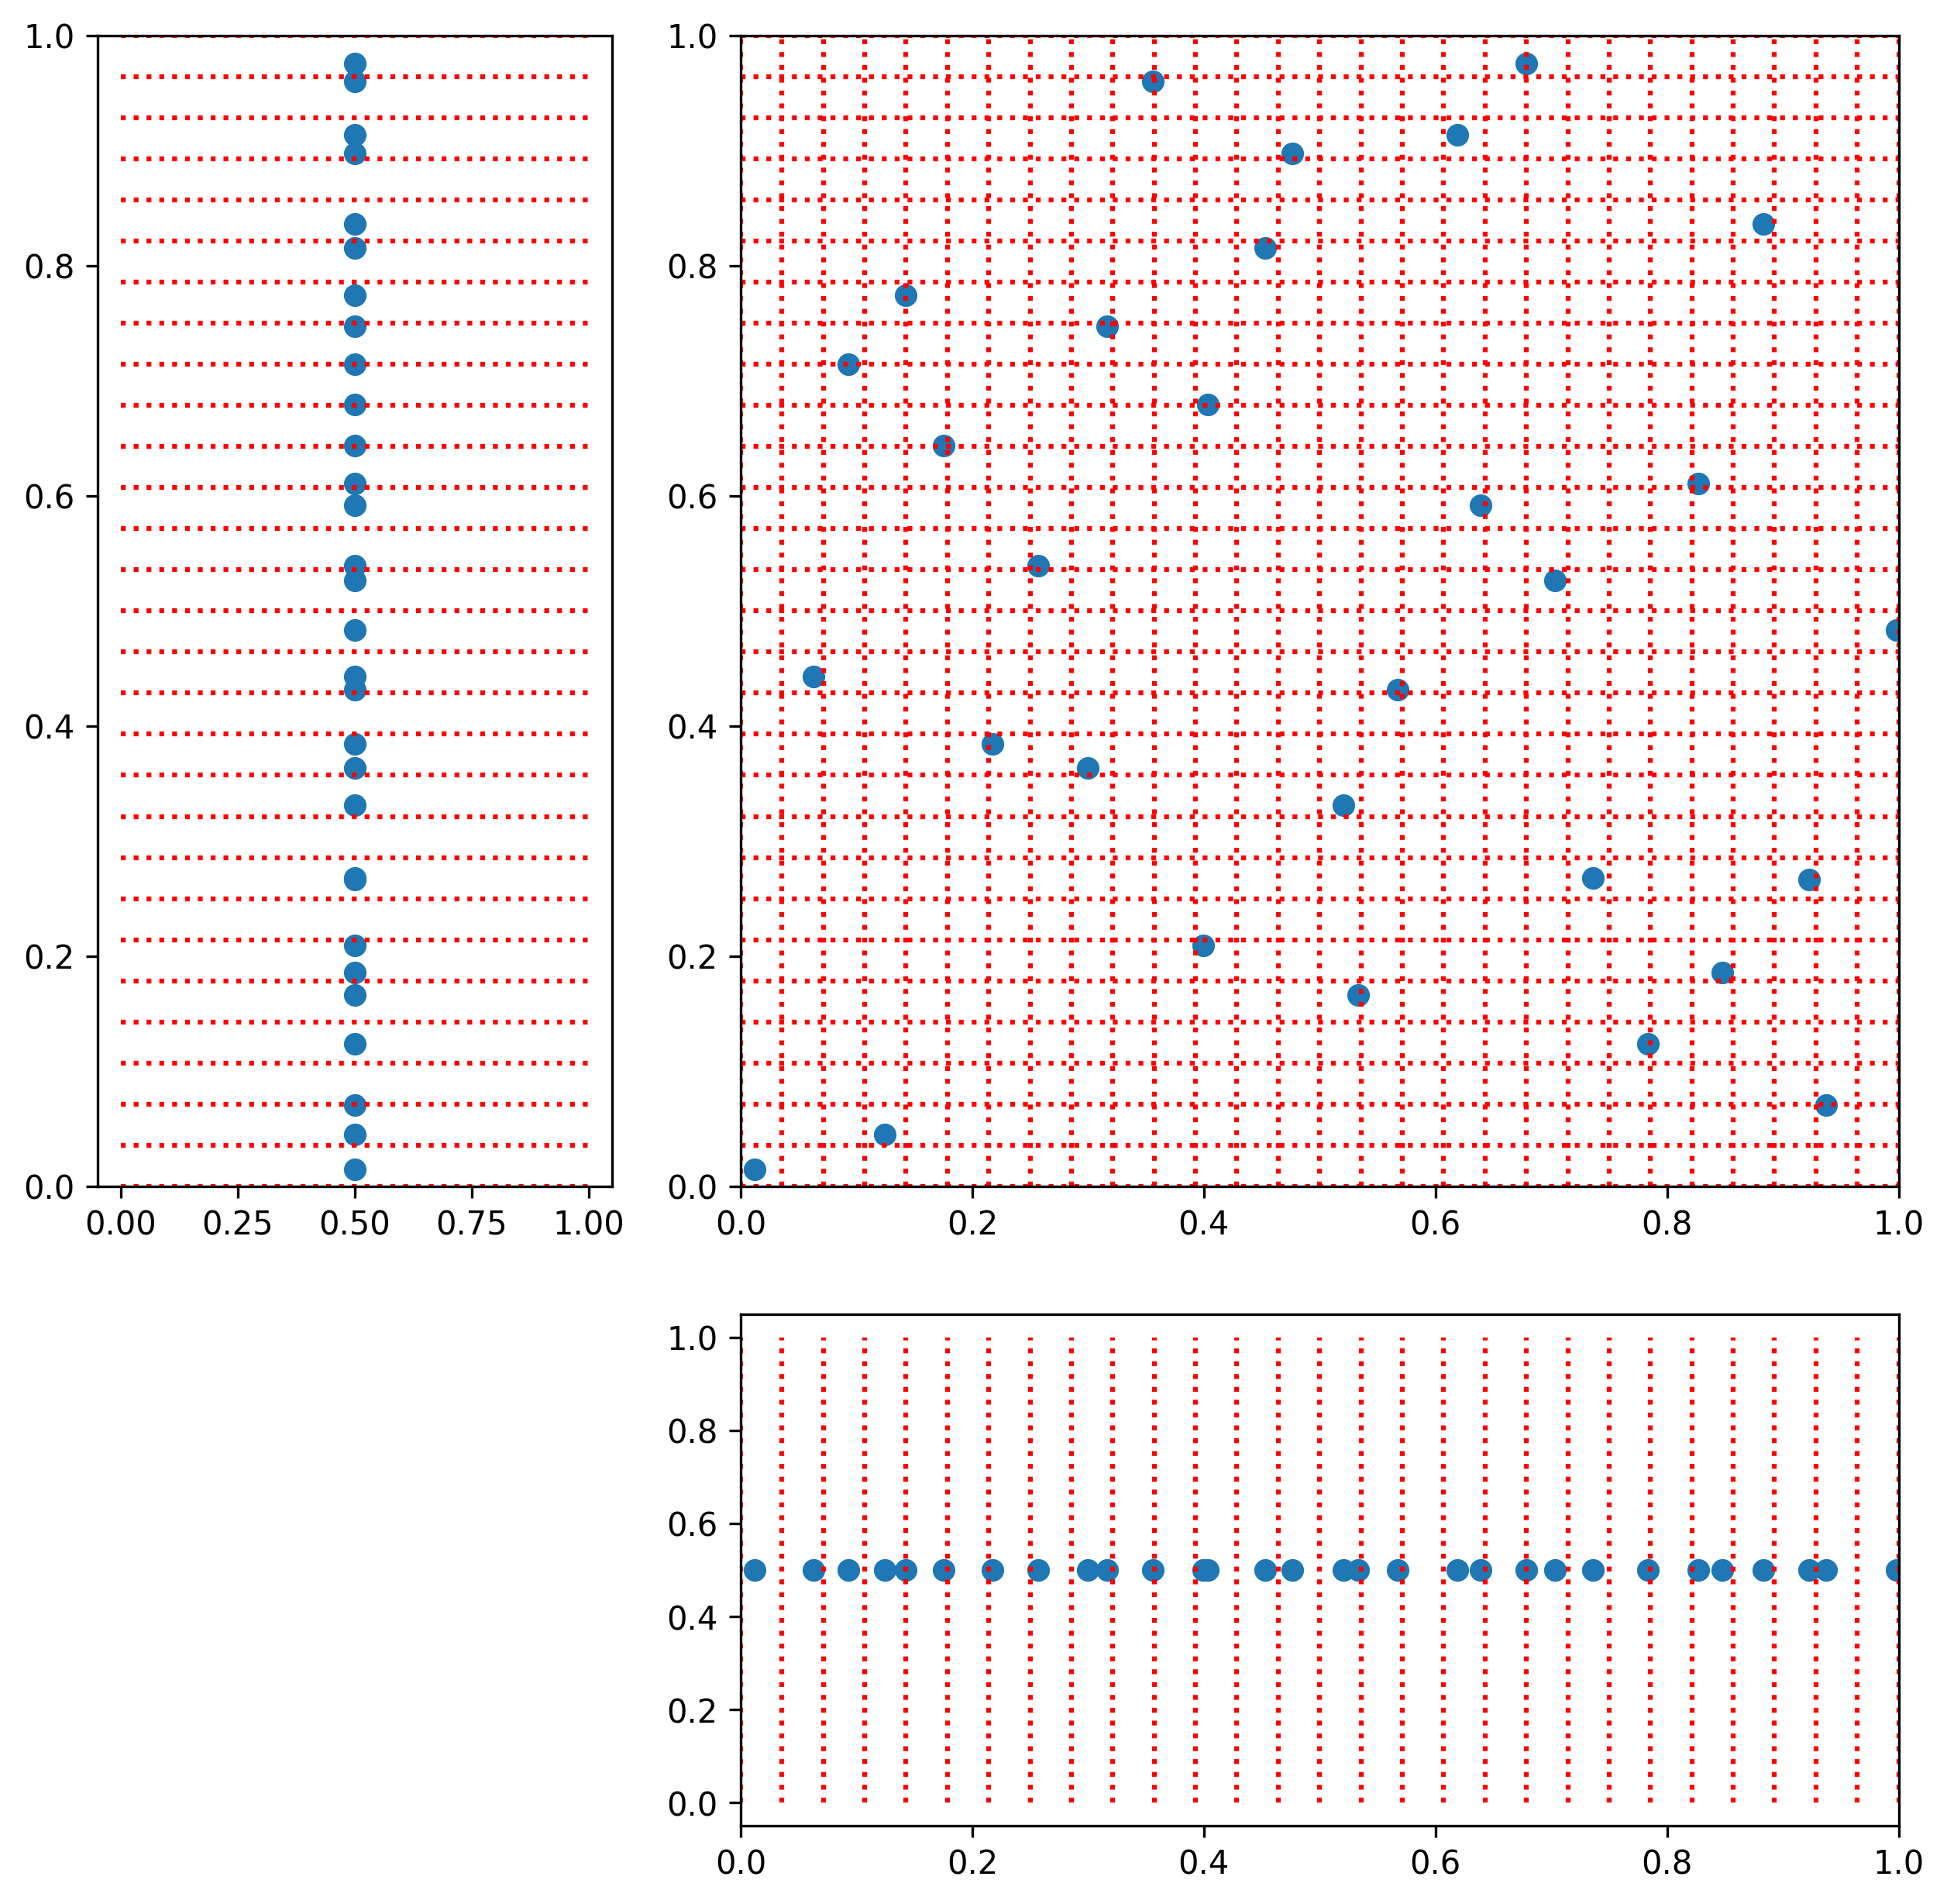

In [5]:
import varstool.sampling.lhs as lhs

# Crieterion for optimizer: center // maximin // centermaximin // correlation
X_temp = lhs(
    sp = n_samples, params=n_params, seed=rand_seed0,
    criterion='maximin', iterations=50)
X['lhs'] = X_temp

plot_scatter_plot(X_temp, sub_dims = sub_dims)

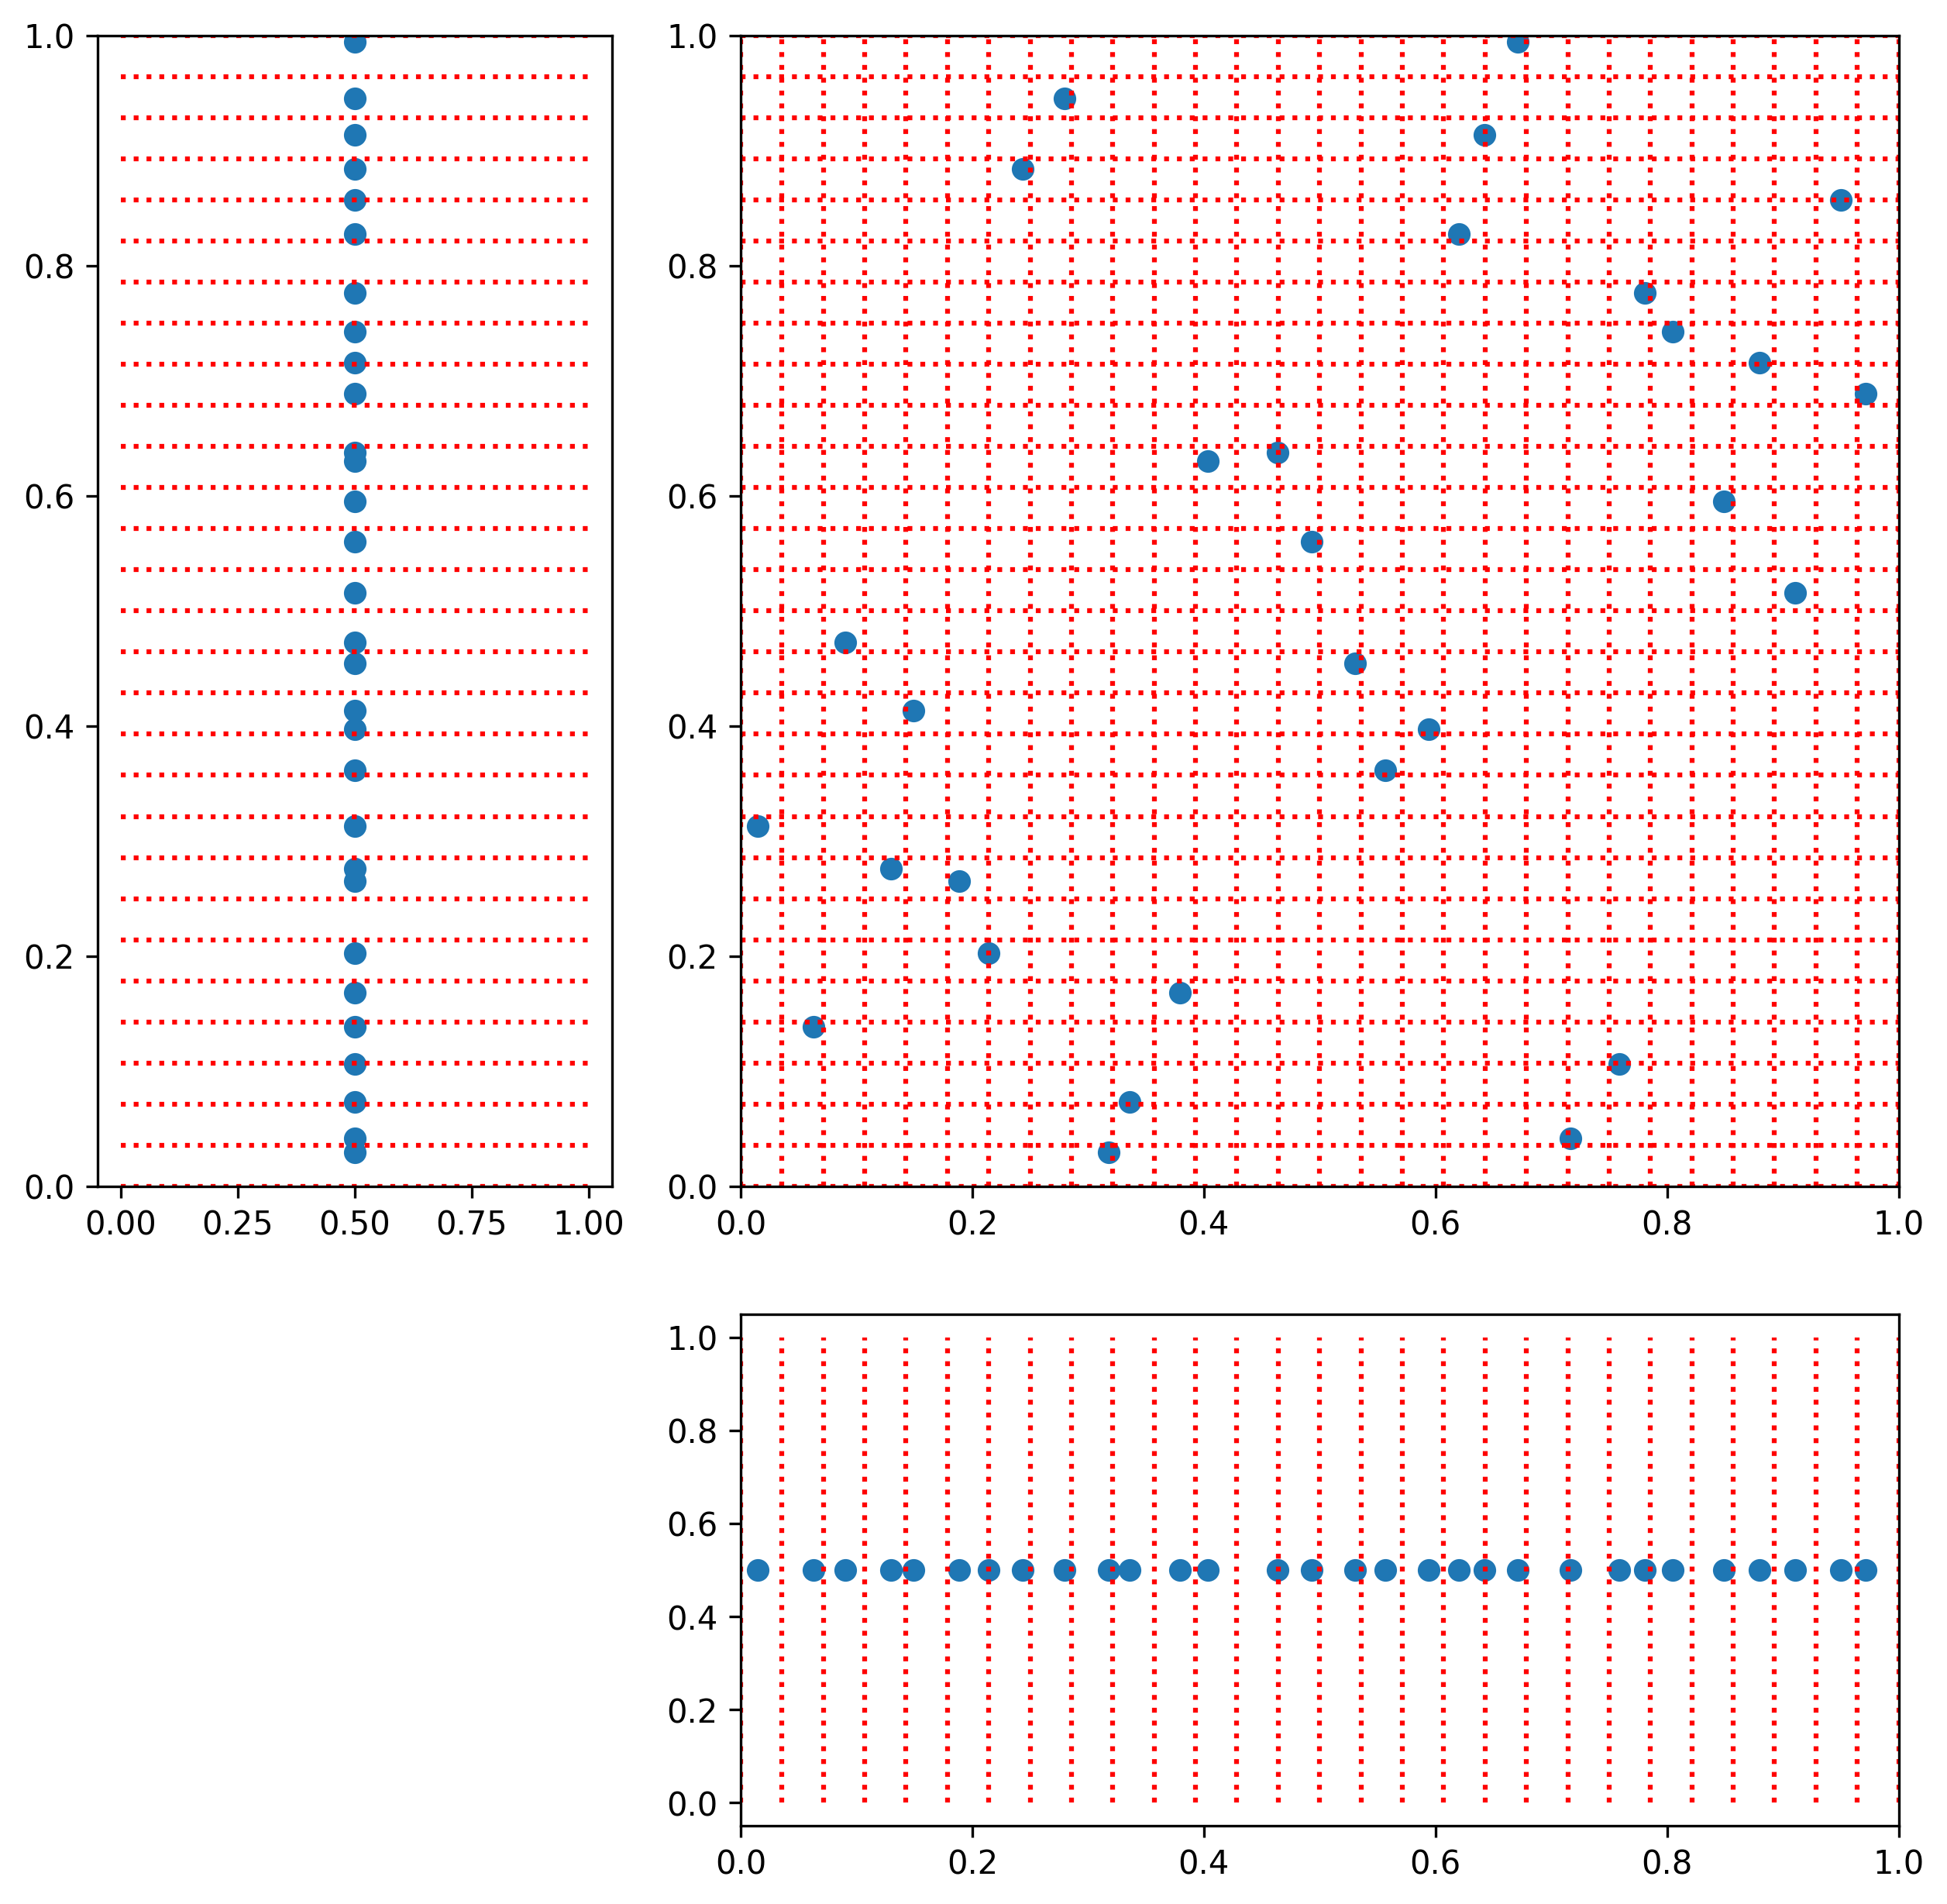

In [6]:
import varstool.sampling.symlhs as symlhs

# Crieterion for optimizer:  maximin // correlation
X_temp = symlhs(
    sp = n_samples, params=n_params, seed=rand_seed0,
    criterion='maximin', iterations=50)
X['slhs'] = X_temp

plot_scatter_plot(X_temp, sub_dims = sub_dims)

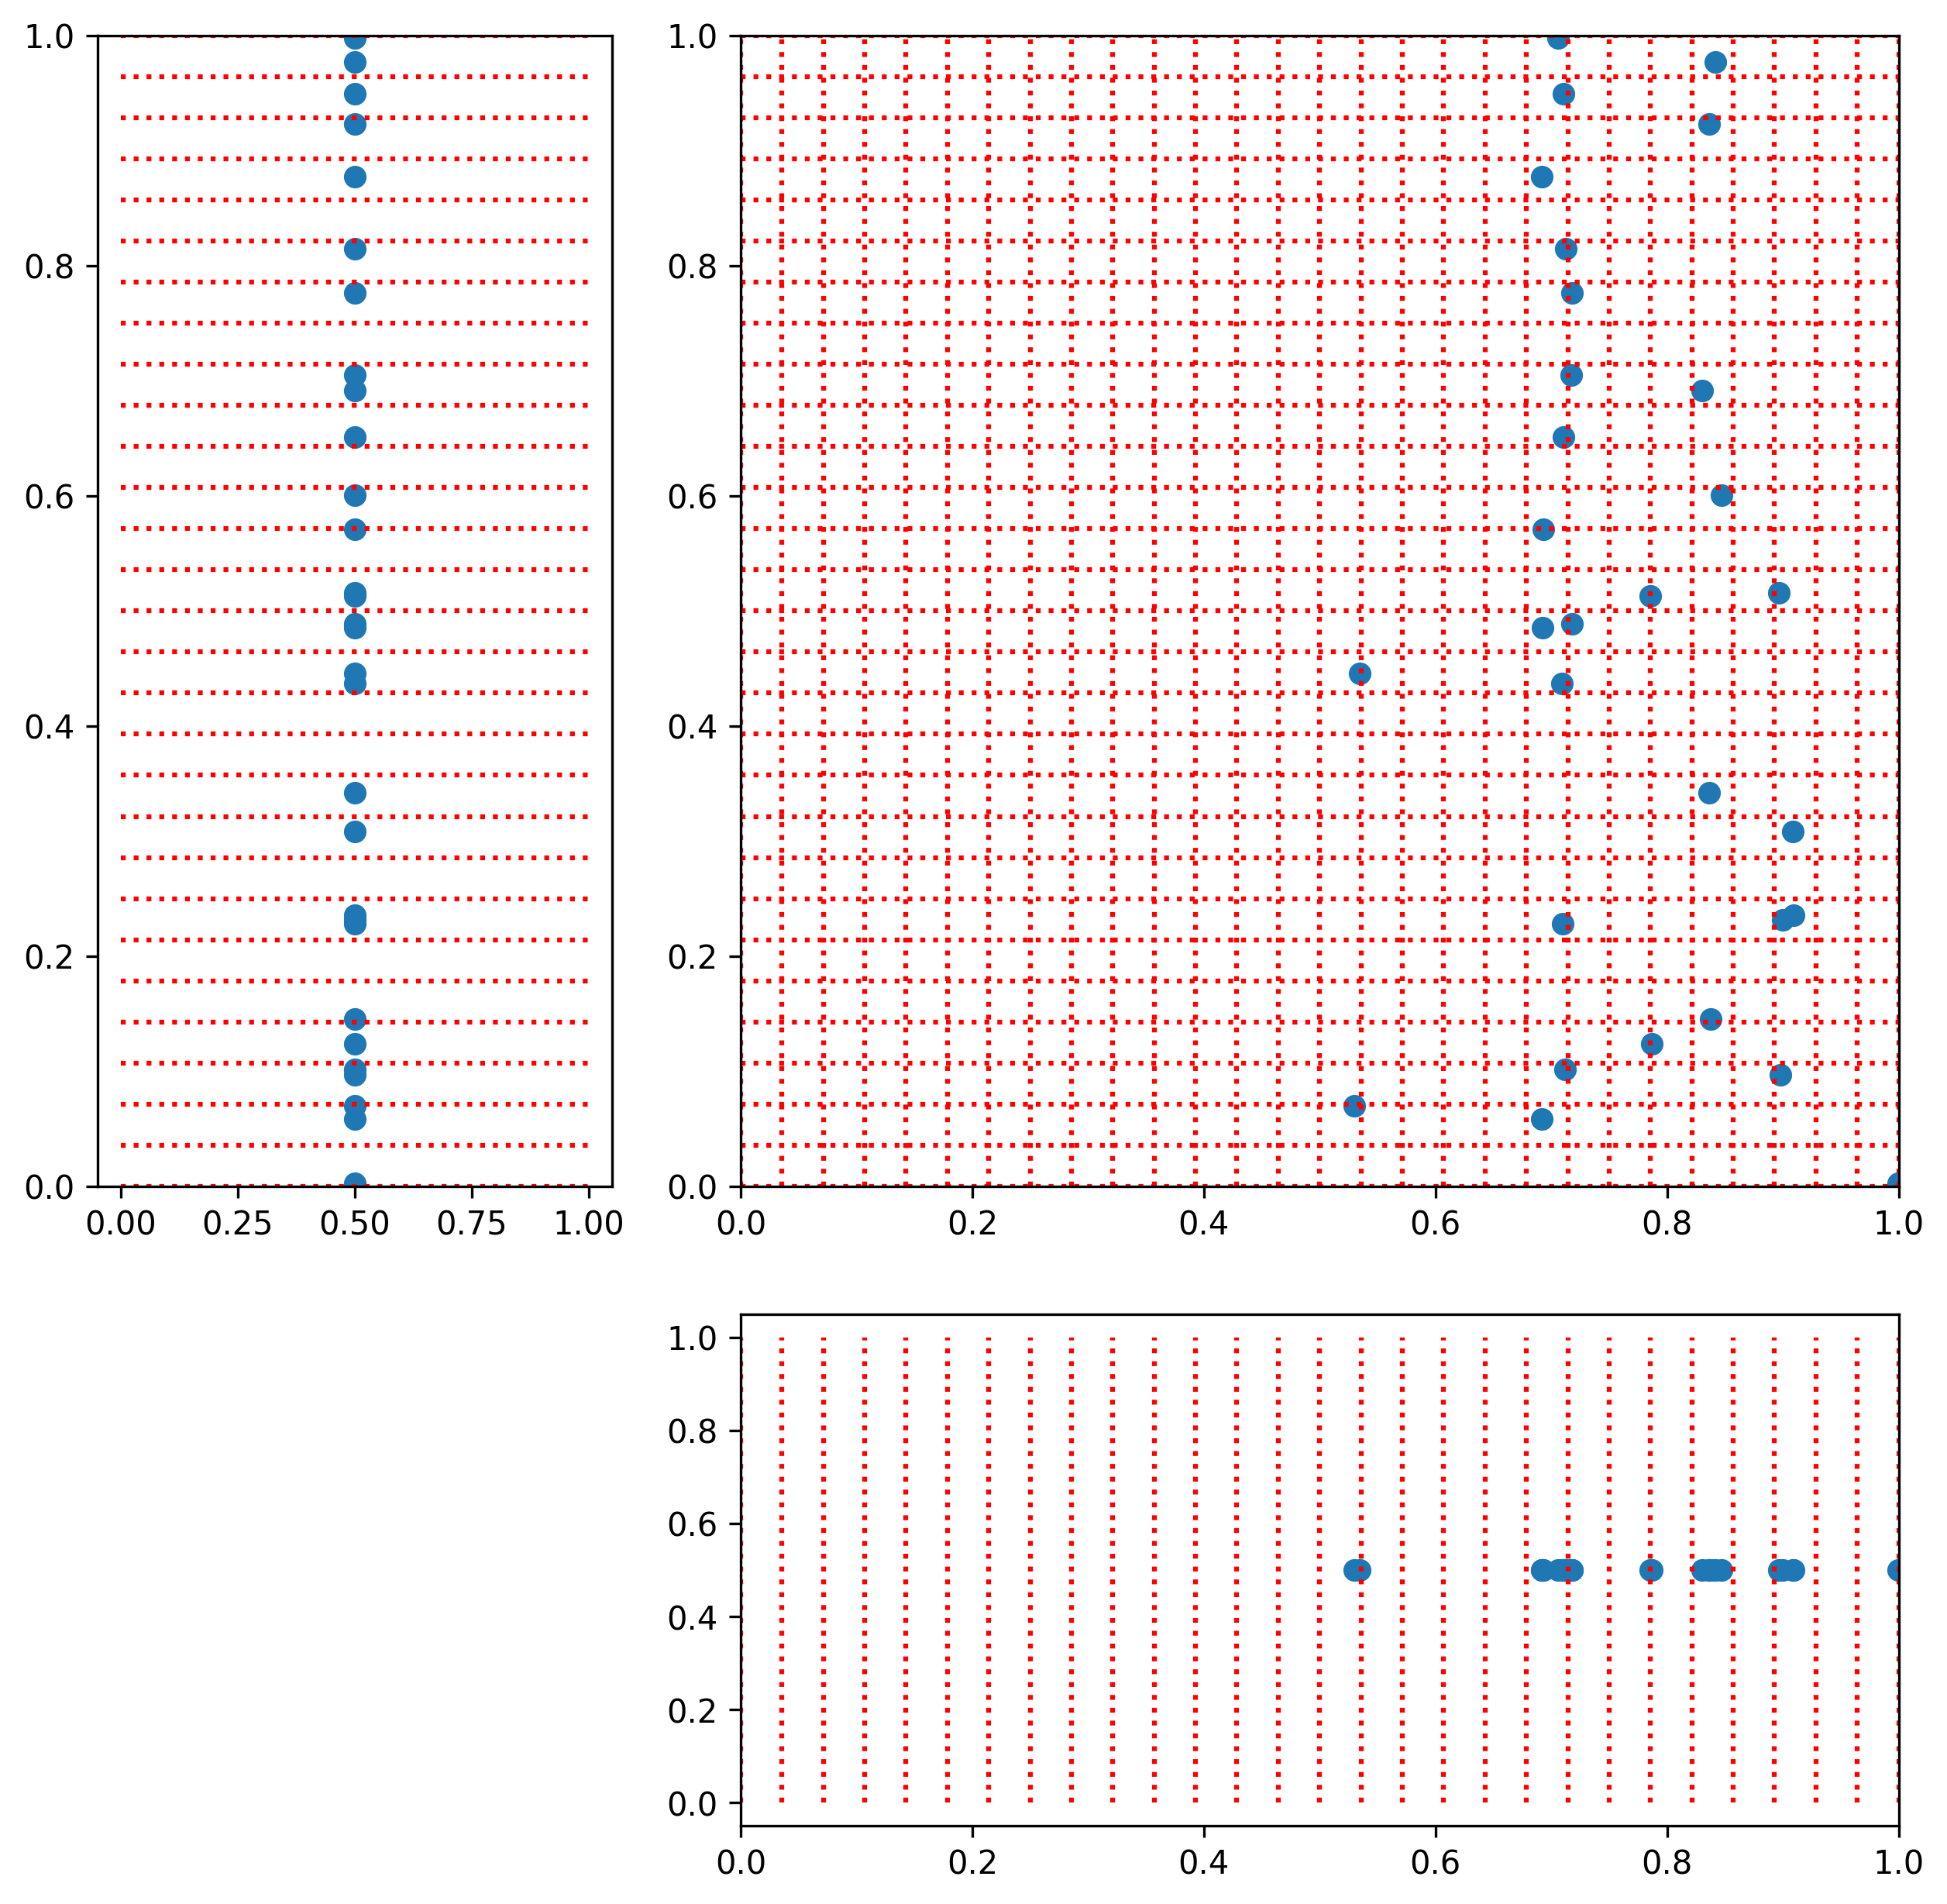

In [7]:
import varstool.sampling.sobol_sequence as sobol

# Crieterion for optimizer:  maximin // correlation
X_temp = sobol(
    sp = n_samples, params=n_params, seed=rand_seed0,
    scramble = False, skip=1000, leap=101)
X['sobol'] = X_temp

plot_scatter_plot(X_temp, sub_dims = sub_dims)

In [8]:
import varstool.sampling.plhs as plhs

# Crieterion for optimizer:  maximin // correlation
X_temp = plhs(
    sp = n_samples, params=n_params, seed=rand_seed0,
    slices = n_slices, iterations = 50,
    criterion='maximin')

print(X_temp[0].shape)
print(X_temp[1].shape)
X['plhs'] = X_temp
plot_scatter_plot(X_temp[0], sub_dims = sub_dims)

In [ ]:
X_tmp = np.concatenate(X_temp[1][:1], axis = 0)
plot_scatter_plot(X_tmp, sub_dims = sub_dims)

X_tmp = np.concatenate(X_temp[1][:2], axis = 0)
plot_scatter_plot(X_tmp, sub_dims = sub_dims)

X_tmp = np.concatenate(X_temp[1][:3], axis = 0)
plot_scatter_plot(X_tmp, sub_dims = sub_dims)